**Importing Dataset**

In [ ]:
import pandas as pd

In [ ]:
url  =   'https://drive.google.com/file/d/1x_sAtN5UIZXZ_dcoLBsq9HEN7qqrehpn/view?usp=drive_link'
path =   'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mushroom = pd.read_csv(path) #train.csv

In [ ]:
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
mushroom #checking the content of csv

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Importing pandas libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

**Data Analysis**

In [ ]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
mushroom['class'].unique() # here in this dataset have two claasification. Either the mushroom is poisonous or edible

array(['p', 'e'], dtype=object)

In [ ]:
mushroom.shape  #Here in this dataset have 22 features(1st one is label) and 8124 instances.

(8124, 23)

<Axes: xlabel='class', ylabel='Count'>

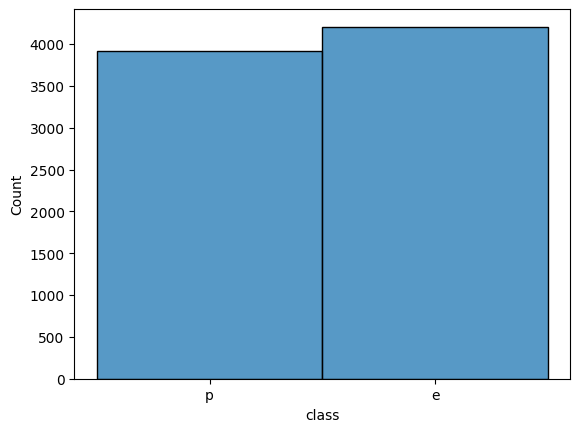

In [ ]:
import matplotlib.pyplot as plt
import seaborn  as sns
sns.histplot(mushroom['class'])

In [ ]:
mushroom.isnull().sum()     # no null value

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Separating Features and Target**

In [ ]:
# X and y creation
X = mushroom    # keep all columns in x
y = X.pop('class')

As all the values in the dataset are categorical. X can be encoded using pandas dummy variable and y using LabelEncoder.

Dummy variable creates a separte column for each unique value of the column, where as LabelEncoder encodes target labels with value between 0 and n_classes-1. LabelEncoder should be used to encode target values, i.e. y, and not the input X.

In [ ]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y = encode.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


For y variable encoding is done as Poisonous = p -> 1 Edible = e -> 0

**Splitting Dataset to training and test data**

In [ ]:
# data splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape ,X_test.shape

((6499, 117), (1625, 117))

In [ ]:
y_train.shape , y_test.shape

((6499,), (1625,))

**Decision Tree Creation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

**Fitting Decision Tree classifier to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT

clf_gini = DT(criterion='gini',max_depth=3,random_state=1)
#fitting training data
clf_gini.fit(X_train, y_train)
#clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
mushroom.columns = mushroom.columns.str.replace(' ','')
mushroom.head(5)



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#plotiing the tree
plt.figure(figsize=(16,8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

[Text(0.5769230769230769, 0.875, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3076923076923077, 0.625, 'x[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.15384615384615385, 0.375, 'x[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.46153846153846156, 0.375, 'x[63] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.8461538461538461, 0.625, 'x[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7692307692307693, 0.375, 'x[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.002\nsamples = 2740\nval

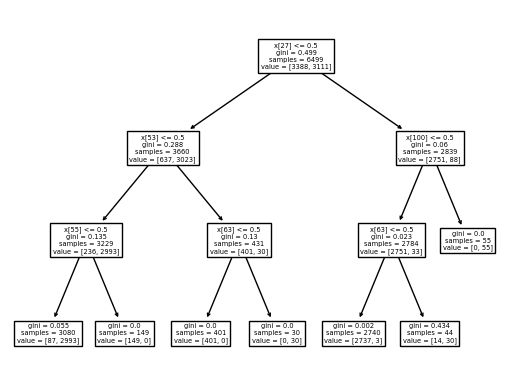

In [ ]:
tree.plot_tree(clf_gini.fit(X_train,y_train))

In [ ]:
#Predict the values
y_pred_gini =clf_gini.predict(X_test)



Overfitting occurs when accuracy for traning set is high and test set is very low comparing to training set. Overfitting is very common problem with decision tree.

In [ ]:
#Predict the value using X train for accuracy comparision
#y_pred_train_gini = clf_gini.predict(X_train)

#y_pred_train_gini

y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
#Determine the accuracy score

print('Model accuracy score with criterion bini index : {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))
#Accuracy Score for training set
print ('Training set accuracy score :{0:04f}'.format(accuracy_score(y_train,y_pred_train_gini)))

Model accuracy score with criterion bini index : 0.9902
Training set accuracy score :0.983998


There is a very small difference to avoid this difference let us try next model


Creation of Decision Tree using with entropy

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
#fitting training data
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.5, 0.875, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.2, 0.625, 'x[21] <= 0.5\nentropy = 0.667\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.1, 0.375, 'entropy = 0.0\nsamples = 2583\nvalue = [0, 2583]'),
 Text(0.3, 0.375, 'x[53] <= 0.5\nentropy = 0.976\nsamples = 1077\nvalue = [637, 440]'),
 Text(0.2, 0.125, 'entropy = 0.933\nsamples = 676\nvalue = [236, 440]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.8, 0.625, 'x[100] <= 0.5\nentropy = 0.199\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7, 0.375, 'x[63] <= 0.5\nentropy = 0.093\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.6, 0.125, 'entropy = 0.012\nsamples = 2740\nvalue = [2737, 3]'),
 Text(0.8, 0.125, 'entropy = 0.902\nsamples = 44\nvalue = [14, 30]'),
 Text(0.9, 0.375, 'entropy = 0.0\nsamples = 55\nvalue = [0, 55]')]

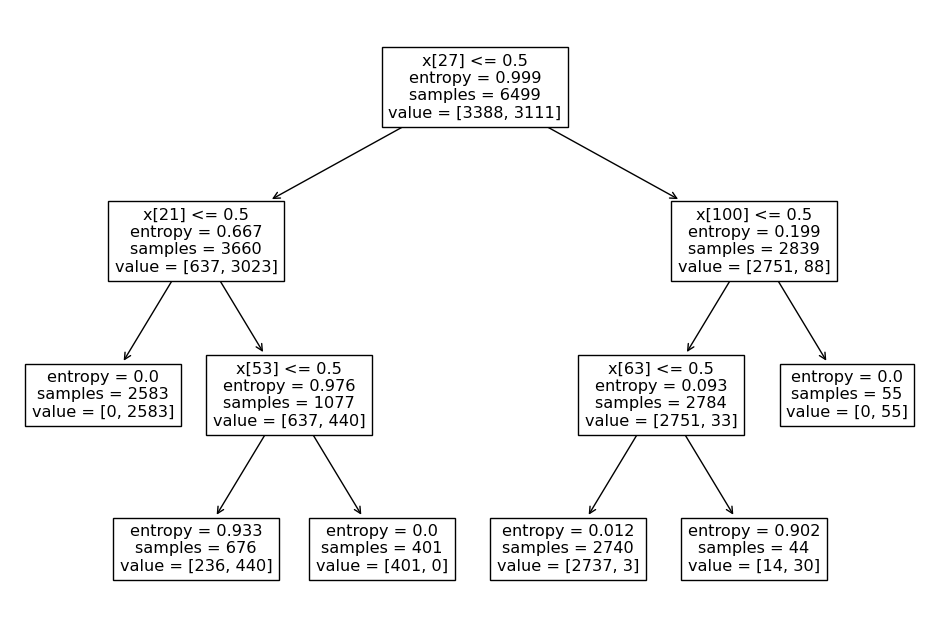

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train,y_train))

#

In [ ]:
#predict the values
y_pred_en=clf_en.predict(X_test)


In [ ]:
#Predict the value using X train for accuracy comparision
#y_pred_train_en = clf_en.predict(X_trai)

#Predict the value using X train for accuracy comparion
y_pred_train_en=clf_en.predict(X_train)

In [ ]:
#Checking the score
print('Model accuracy score with DT criterion entropy :{0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train,y_pred_train_en)))


Model accuracy score with DT criterion entropy :0.9637
Training-set accuracy score: 0.9611


In [ ]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train,y_train)))
print('Test set score:{:.4f}'.format(clf_en.score(X_test,y_test)))


Training set score: 0.9611
Test set score:0.9637


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[766  54]
 [  5 800]]


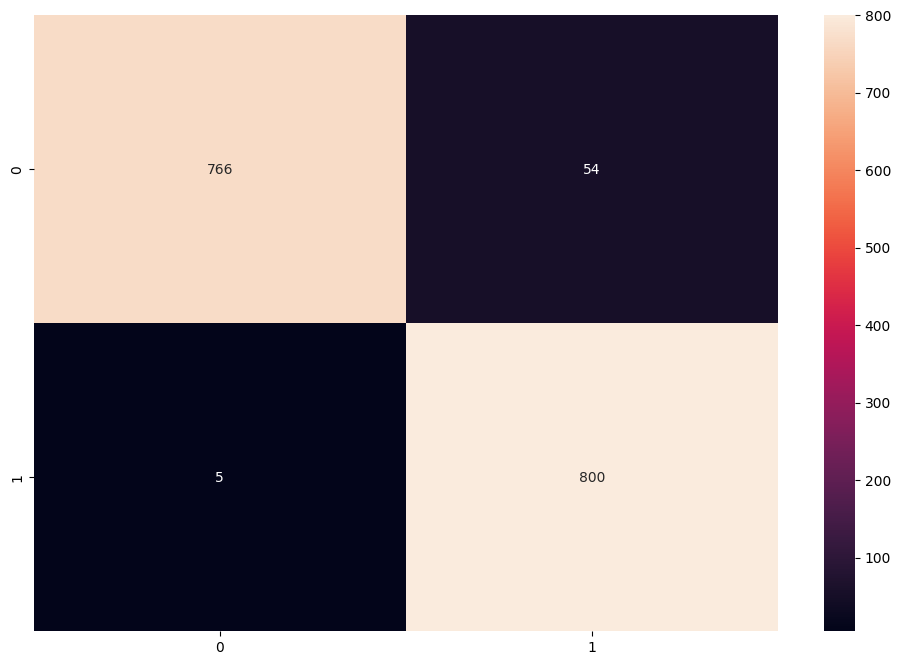

<Figure size 640x480 with 0 Axes>

In [ ]:
#plotting hetmap
plt.subplots(figsize=(12, 8))
heatmap = sns.heatmap(cm,annot=True,linewidth=0.5,fmt= '.0f',linecolor=None) # write fmt='.0f'otherwise the values come in different format
plt.show()
plt.savefig('ConfusionMatrix.png')